In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Jury selection

In [ ]:
population = 16000
proportion_black = .26
num_black = int(population*proportion_black)
num_nonblack = population - num_black
# A table with 16000 rows, representing the population that was
# eligible for juries.
eligible = Table().with_columns(
    "Race", np.append(np.repeat("Black", num_black), np.repeat("Non-black", num_nonblack)))

# The test statistic:
def num_black(pool):
    """Given a table with a 'Race' column, returns the number of rows labeled 'black'."""
    return pool.where("Race", are.equal_to("black")).num_rows

# A function to simulate once under the null hypothesis:
def simulate_under_null(sample_size):
    return eligible.sample(sample_size, with_replacement=False)

# A function to simulate a jury pool once under the null hypothesis and then
# return the test statistic for that simulated jury pool.
def count_black_in_sample(sample_size):
    return num_black(simulate_number_null(sample_size))

# A function to run many simulations under the null hypothesis
# and return a table of the computed test statistics for each
# simulation:
def simulate_jury_pools(sample_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Sample size", np.repeat(sample_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Number black in sample",
        sample_sizes.apply(count_black_in_sample, "Sample size"))
    return samples

In [ ]:
thousand_simulations = simulate_jury_pools(sample_size=100, num_simulations=1000)

In [ ]:
thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))

In [ ]:
# Can draw a red line using the plots package. (You
# don't need to know how to do this.)
thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))
plots.axvline(8, color="red")

In [ ]:
# Good idea to check the actual number of simulations where
# there were very few black jurors:
thousand_simulations.where(1, are.below(10))

In [ ]:
ten_thousand_simulations = simulate_jury_pools(100, 10000)
ten_thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))

In [ ]:
ten_thousand_simulations.hist("Number black in sample", bins=np.arange(100+1))
plots.axvline(8, color="red")

## The GSI's defense

In [ ]:
scores = Table.read_table('scores_by_section.csv')
scores

In [ ]:
max(scores.column("Midterm"))

In [ ]:
scores.group('Section', np.mean).barh("Section", "Midterm mean")

In [ ]:
scores.group('Section').show()

In [29]:
def average_score(section):
    return np.mean(section.column("Midterm"))

In [36]:
section_3_mean = average_score(scores.where("Section", are.equal_to(3)))
section_3_mean

13.666666666666666

### Hypothesis testing

In [32]:
# What happens if we randomly sample students and imagine assigning
# them to section 3?
average_score(scores.sample(27, with_replacement=False))

15.777777777777779

In [33]:
def simulate_scores_under_null(section_size):
    random_section = scores.sample(section_size, with_replacement=False)
    return average_score(random_section)

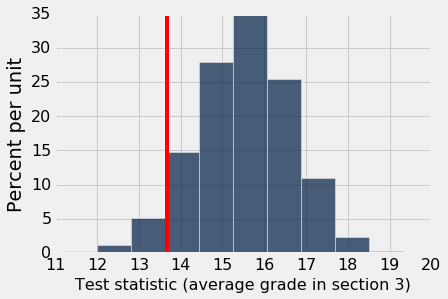

In [39]:
repetitions = 10000

simulations = Table().with_columns(
    "Section size", np.repeat(27, repetitions))
test_statistics_under_null = simulations.apply(simulate_scores_under_null, "Section size")
results = simulations.with_column("Test statistic (average grade in section 3)", test_statistics_under_null)
results.hist("Test statistic (average grade in section 3)")

# Plot the observed statistic on the horizontal axis for visual reference:
plots.axvline(section_3_mean, color='red');

In [40]:
results.where("Test statistic (average grade in section 3)", are.below(section_3_mean)).num_rows

553

In [41]:
results.num_rows

10000

In [42]:
results.where("Test statistic (average grade in section 3)", are.below(section_3_mean)).num_rows / results.num_rows

0.0553